# Hands-on Exercise for Module 1: Exploratory Data Analysis

### 0.Importing important packages

In [212]:
# data loading and computing functionality
import pandas as pd
import numpy as np
import scipy as sp

# datasets in sklearn package
from sklearn import datasets
from sklearn.datasets import load_digits

# visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#PCA, SVD, LDA
from sklearn.decomposition import PCA
from scipy.linalg import svd
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
            

### 1. Loading data, determining samples, attributes, and types of attributes

Use Davis dataset avaialble at the url https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv
    
Description of the data is provided at http://math.furman.edu/~dcs/courses/math47/R/library/car/html/Davis.html

Drop rows in the data set with missing values (NA), using dropna(inplace=True) function.

<span style="color:red">**Question 1a:** </span> Based on the data description, ware the data points and what are the attributes in this data? <br>

<span style="color:green">Answer:</span> The data has 200 datapoints and 6 columns (including the unnamed count label). This data capture information about men and women engaged in regular exercise.

Attributes in the data are :
1. Unnamed : Count Label
2. Sex - A factor with levels: F female, M Male
3. Weight - Measured weight in kg
4. Height - Measured height in cm
5. Repwt - Reported weight in kg
6. Repht - Reported height in cm


<span style="color:red">**Question 1b:** </span> Who are selected as subjects in the study? <br>

<span style="color:green">Answer:</span> The subjects of this study are men and women engaged in regular exercise.

<span style="color:red">**Question 1c:** </span> How many data points are in this dataset? <br>

In [213]:
davis_df = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/carData/Davis.csv')

In [214]:
davis_df

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
197,198,M,81,175,NaN,NaN
198,199,M,90,181,91.0,178.0


In [215]:
davis_df.dropna(inplace=True);

In [216]:
davis_df

,Unnamed: 0,sex,weight,height,repwt,repht
0,1,M,77,182,77.0,180.0
1,2,F,58,161,51.0,159.0
2,3,F,53,161,54.0,158.0
3,4,M,68,177,70.0,175.0
4,5,F,59,157,59.0,155.0
...,...,...,...,...,...,...
194,195,F,62,164,61.0,161.0
195,196,M,74,175,71.0,175.0
196,197,M,83,180,80.0,180.0
198,199,M,90,181,91.0,178.0


In [217]:
davis_df.shape

(181, 6)

 <span style="color:green">Answer:</span> There were originally 200 data points, after dropping the rows with missing values using dropna function we are left with 181 data points. 

<span style="color:red">**Question 1d:** </span> How many attributes are in this dataset? <br>

 <span style="color:green">Answer:</span> 6 attributes

<span style="color:red">**Question 1e:** </span> What type of attributes are present in the dataset? <br> 
       

In [218]:
davis_df.dtypes

Unnamed: 0      int64
sex            object
weight          int64
height          int64
repwt         float64
repht         float64
dtype: object

 <span style="color:green">Answer:</span> Types of data attributes
 
 1. Unnamed - Numeric (discrete, label for the data points)
 2. sex - categorical (nomimal)
 3. weight - numeric (discrete)
 4. height - numeric (discrete)
 5. repwt - numeric (continuous)
 6. repht - numeric (continuous)

### 2. Generating summary statistics

Use 'Davis' data. Do not include Unnamed attribute in this analysis. 

In [219]:
davis_df.drop(columns=davis_df.columns[davis_df.columns.str.contains('unnamed', case=False)], inplace=True)
davis_df.head()

,sex,weight,height,repwt,repht
0,M,77,182,77.0,180.0
1,F,58,161,51.0,159.0
2,F,53,161,54.0,158.0
3,M,68,177,70.0,175.0
4,F,59,157,59.0,155.0


<span style="color:red">**Question 2a:** </span> What are range of values the numeric attributes take? <br> 
[Hint: Use exclude=object option in describe() function to ignore the attribute sex]

In [220]:
davis_df.describe(exclude=['object'])

,weight,height,repwt,repht
count,181.000000,181.000000,181.000000,181.000000
mean,66.303867,170.154696,65.679558,168.657459
std,15.340992,12.312069,13.834220,9.394668
min,39.000000,57.000000,41.000000,148.000000
25%,56.000000,164.000000,55.000000,161.000000
50%,63.000000,169.000000,63.000000,168.000000
75%,75.000000,178.000000,74.000000,175.000000
max,166.000000,197.000000,124.000000,200.000000


 <span style="color:green">Answer:</span> Range of the values :
 
 1. Weight = [39, 166] in kg
 2. Height = [57, 197] in cm
 3. Reported Weight = [41, 124] in kg
 4. Reported Height = [148, 200] in cm

<span style="color:red">**Question 2b:** </span> What different values do categorical attributes take? <br> 
[Hint: Use include=object option in describe() function to ignore the attribute sex]

In [221]:
davis_df['sex'].value_counts()

F    99
M    82
Name: sex, dtype: int64

 <span style="color:green">Answer:</span> The categorical attribute sex takes the value as F 99 times and M 82 times

<span style="color:red">**Question 2c:** </span> What are the mean values for each of the numeric attributes? <br> 

In [222]:
davis_df.mean()

weight     66.303867
height    170.154696
repwt      65.679558
repht     168.657459
dtype: float64

<span style="color:red">**Question 2d:** </span> What is the variance for each of the numeric attributes? <br> 

In [223]:
davis_df.var()

weight    235.346041
height    151.587047
repwt     191.385635
repht      88.259791
dtype: float64

<span style="color:red">**Question 2e:** </span> Visually examine how the attribute 'weight' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

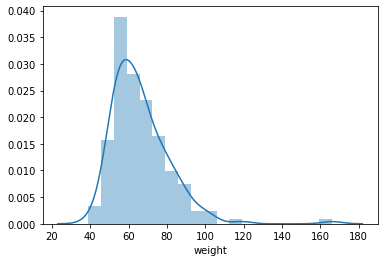

In [224]:
sns.distplot(davis_df['weight'])

 <span style="color:green">Answer:</span> The attribute 'weight' is not normally distributed rather it appears to be Right Skewed

<span style="color:red">**Question 2f:** </span> Visually examine how the attribute 'height' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

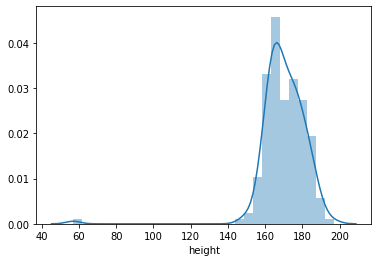

In [225]:
sns.distplot(davis_df['height'])

 <span style="color:green">Answer:</span>  The attribute 'height' is not normally distributed rather it appears to be Left Skewed

<span style="color:red">**Question 2g:** </span> Visually examine how the attribute 'repwt' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

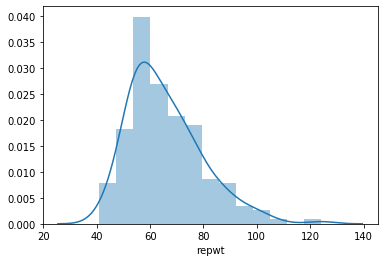

In [226]:
sns.distplot(davis_df['repwt'])

 <span style="color:green">Answer:</span>  The attribute 'repwt' is not normally distributed rather it appears to be slightly Right Skewed

<span style="color:red">**Question 2h:** </span> Visually examine how the attribute 'repht' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution?

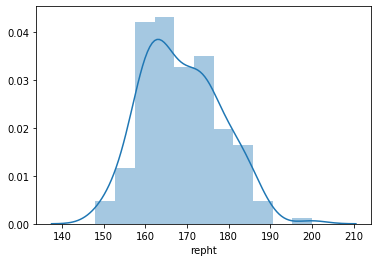

In [227]:
sns.distplot(davis_df['repht'])

 <span style="color:green">Answer:</span>  The attribute 'repht' is not normally distributed rather it appears to be Right Skewed. It seems like a bi modal distribution.

<span style="color:red">**Question 2i:** </span> Visually examine how the attribute 'sex' is distributed and comment if the distribution is more similar to a Gaussian distribution or to a uniform distribution? 

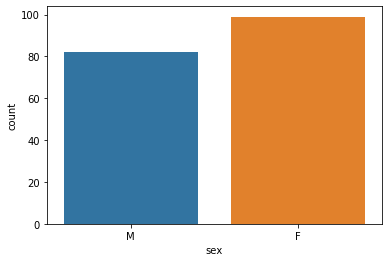

In [228]:
sns.countplot(davis_df['sex'])

 <span style="color:green">Answer:</span>  The sex is unequally distributed with 99F and 82M. This is not like a Gaussian Distribution

<span style="color:red">**Question 2j:** </span> Is it possible for attribute 'sex' to follow a Gaussian distribution? Support your answer with a rationale. 

 <span style="color:green">Answer:</span> Since, nomimal data takes only specified values and is on no order - F and M, all we can say is about the count of such labels in the data but then it doesn't make sense to get a Gaussian distribution for the same

### 3. Geometric and Probabilistic view

<span style="color:brown">**Note:** </span> For this part, we will restrict to 'repwt' and 'repht' attributes in the davis dataset as we can only visualize 2D space.

In [229]:
davis_df_new = davis_df[['repwt','repht']]

In [230]:
davis_df_new.head()

,repwt,repht
0,77.0,180.0
1,51.0,159.0
2,54.0,158.0
3,70.0,175.0
4,59.0,155.0


<span style="color:red">**Question 3a:** </span> Show the Geometric view of this data 'davis_df_new' on a 2D space along with the mean. 

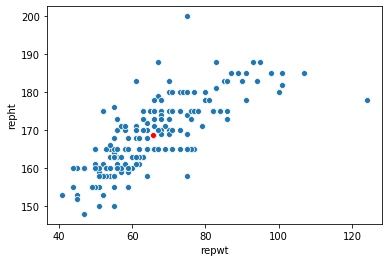

In [231]:
fig, ax = plt.subplots()
sns.scatterplot(x='repwt',y='repht',data=davis_df_new,ax=ax)
mu = np.mean(davis_df_new.values,0)
sns.scatterplot(x=[mu[0], mu[0]],y=[mu[1], mu[1]],color='r',ax=ax)

Mean : 65.68, 168,66

<span style="color:red">**Question 3b:** </span> From the geometric view, state your observations about the data and any relationships you observe between the attributes. 

 <span style="color:green">Answer:</span> As repwt values are increasing repht is also increasing, the mean is centered somewhere approximately in between the data points.
The data seems to be positively co-related as we can see a positive trend.

We will further normalize the magnitude of each row in the data (davis_df_new) to 1 and use the new dataframe davis_df_new_row_norm.

In [232]:
from sklearn.preprocessing import normalize
davis_df_new_row_norm = normalize(davis_df_new, axis=1, norm='l2')
df = pd.DataFrame(davis_df_new_row_norm)

In [233]:
davis_df_new_row_norm = davis_df_new_row_norm.astype(float)

In [234]:
davis_df_new_row_norm[1:10,:]

array([[0.30542755, 0.95221532],
       [0.32340548, 0.94626048],
       [0.37139068, 0.92847669],
       [0.35574458, 0.93458322],
       [0.41835989, 0.90828134],
       [0.42288547, 0.90618314],
       [0.37582461, 0.92669081],
       [0.37595091, 0.92663958],
       [0.35232976, 0.93587592]])

<span style="color:red">**Question 3c:** </span> Show the Geometric view of this new row normalized data on a 2D space along with the mean. 

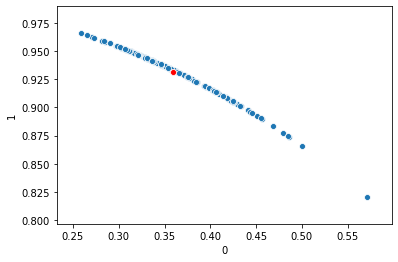

In [235]:
fig, ax = plt.subplots()
sns.scatterplot(x=df[0], y=df[1], data=df, ax=ax)
mu = np.mean(df,0)
sns.scatterplot(x=[mu[0], mu[0]],y=[mu[1], mu[1]],color='r',ax=ax)

In [236]:
df[0]

0      0.393303
1      0.305428
2      0.323405
3      0.371391
4      0.355745
         ...   
176    0.354304
177    0.375951
178    0.406138
179    0.455199
180    0.414188
Name: 0, Length: 181, dtype: float64

<span style="color:red">**Question 3d:** </span> Comment on the new geomateric view of the data in comparison to the view you observed in Question 3b. Provide a reason for the difference in the two geometric views.

 <span style="color:green">Answer:</span> The new geometric view observed has negative covariance. Initially the data points had positive covariance. Because of the row normalization the correlation is changing as rows have points with different units while the eucledian distance doesn't distinguish between different units.If the normalization was performed on the column level the correlation would not have changed due to similarity of units.

<span style="color:red">**Question 3e:** </span> Show the Probabilistic view of the data davis_df_new.

In [237]:
from scipy.stats import multivariate_normal

mu = np.mean(davis_df_new.values,0)
Sigma = np.cov(davis_df_new.values.transpose())

min_length = np.min(davis_df_new.values[:,0]);
min_width = np.min(davis_df_new.values[:,1]);
max_length = np.max(davis_df_new.values[:,0]);
max_width = np.max(davis_df_new.values[:,1]);
x, y = np.mgrid[min_length:max_length:50j, min_width:max_width:50j]

positions = np.empty(x.shape + (2,))
positions[:, :, 0] = x; 
positions[:, :, 1] = y

F = multivariate_normal(mu, Sigma)
Z = F.pdf(positions)


Text(0.5, 1.0, 'Probabilistic view')

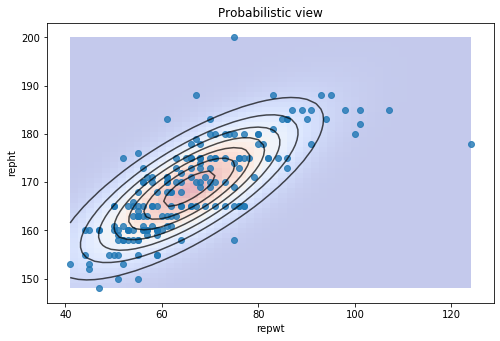

In [238]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.imshow(np.rot90(Z), cmap='coolwarm', extent=[min_length,max_length, min_width,max_width], alpha=0.3)
cset = ax.contour(x, y, Z, colors='k', alpha=0.7)
plt.scatter(davis_df_new.values[:,0],davis_df_new.values[:,1],alpha=0.8)
ax.set_xlabel('repwt')
ax.set_ylabel('repht')
plt.title('Probabilistic view')

We will normalize the magnitude of each column in the data (davis_df_new) to 1 and use the new dataframe davis_df_new_col_norm.

In [239]:
davis_df_new_col_norm = normalize(davis_df_new, axis=0, norm='l2')

In [240]:
davis_df_new_col_norm[1:10,:]

array([[0.05648398, 0.06996539],
       [0.05980657, 0.06952536],
       [0.07752703, 0.07700594],
       [0.06534421, 0.06820526],
       [0.08417221, 0.0726056 ],
       [0.08527974, 0.0726056 ],
       [0.08084962, 0.07920611],
       [0.07863456, 0.07700594],
       [0.07088186, 0.07480577]])

In [241]:
davis_df_new_col_norm = davis_df_new_col_norm.astype(float)

<span style="color:red">**Question 3f:** </span> Show the Probabilistic view of the data davis_df_new_col_norm. 

In [242]:
from scipy.stats import multivariate_normal

mu = np.mean(davis_df_new_col_norm,0)
Sigma = np.cov(davis_df_new_col_norm.transpose())

min_length = np.min(davis_df_new_col_norm[:,0]);
min_width = np.min(davis_df_new_col_norm[:,1]);
max_length = np.max(davis_df_new_col_norm[:,0]);
max_width = np.max(davis_df_new_col_norm[:,1]);
x, y = np.mgrid[min_length:max_length:50j, min_width:max_width:50j]

positions = np.empty(x.shape + (2,))
positions[:, :, 0] = x; 
positions[:, :, 1] = y

F = multivariate_normal(mu, Sigma)
Z = F.pdf(positions)

Text(0.5, 1.0, 'Probabilistic view')

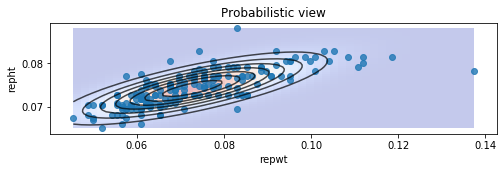

In [243]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.imshow(np.rot90(Z), cmap='coolwarm', extent=[min_length,max_length, min_width,max_width], alpha=0.3)
cset = ax.contour(x, y, Z, colors='k', alpha=0.7)
plt.scatter(davis_df_new_col_norm[:,0],davis_df_new_col_norm[:,1],alpha=0.8)
ax.set_xlabel('repwt')
ax.set_ylabel('repht')
plt.title('Probabilistic view')

<span style="color:red">**Question 3g:** </span> Compare the shape of the covariance structure in Question 3f with that of Question 3e and comment if column normalization has affected the shape of the covariance structure.

<span style="color:green">Answer:</span>  The shape of the covariance structure hasn't changed because of column normalization. The data points have become a bit compact than earlier but the shape is retained.

### 4. Understanding the (in)dependencies among attributes using Covariance matrix

Use 'Davis' data. Do not include Unnamed attribute in this analysis. 

<span style="color:red">**Question 4a:** </span> Compute the covariance matrix.

In [244]:
davis_df.cov()

,weight,height,repwt,repht
weight,235.346041,29.136065,177.292357,91.004665
height,29.136065,151.587047,102.833180,85.497729
repwt,177.292357,102.833180,191.385635,99.017403
repht,91.004665,85.497729,99.017403,88.259791


<span style="color:red">**Question 4b:** </span> Which pairs of attributes co-vary in the opposite direction?

<span style="color:green">Answer: </span> All of the attributes have a positive covariance with respect to each other so none of them co-vary in the opposite direction



<span style="color:red">**Question 4c:** </span> Compute the correlation matrix.

In [245]:
davis_df.corr()

,weight,height,repwt,repht
weight,1.000000,0.154258,0.835376,0.631435
height,0.154258,1.000000,0.603737,0.739166
repwt,0.835376,0.603737,1.000000,0.761860
repht,0.631435,0.739166,0.761860,1.000000


<span style="color:red">**Question 4d:** </span> Which pairs of attributes are highly correlated? Clearly specify the highly positive and highly negatively correlated attributes.

<span style="color:green">Answer: </span> Pairs that highly positive correlated: weight - repwt (covariance - 0.835)> repwt - repht > repht - height > repht - weight > repwt - height (decreasing order)

Highly negative correlated : None


<span style="color:red">**Question 4e:** </span> Which pairs of attributes are uncorrelated?

<span style="color:green">Answer:</span>  Uncorrelated attributes:

1. weight - height (covariance - 0.154)


<span style="color:red">**Question 4f:** </span> What information did you gather from a correlation matrix that is not available in a covariance matrix?

<span style="color:green">Answer:</span> From the correlation matrix we can clearly state how closely the attributes are related to each other versus just commenting on the positive/ negative/ no trends from the covariance matrix.

### 5. Dimensionality Reduction: Feature Selection

**Data:** Iris dataset from the practice notebook. (https://raw.githubusercontent.com/plotly/datasets/master/iris.csv)

**Assumption:** Assume that your goal is to cluster the data to identify the species 'Name'. Clustering algorithm takes as input data points and attributes. It groups points that are similar to each other into a separate cluster. It puts points that are dissimilar in different cluster. Note that the 'Name' attribute will be hidden from the clustering algorithm.

In [246]:
import seaborn as sns
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')

In [247]:
iris_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


<span style="color:red">**Question 5a:** </span> If you are allowed to select only one attribute, which attribute would be highly useful for the clustering task. Provide a reason. Use pairplot to answer this question.

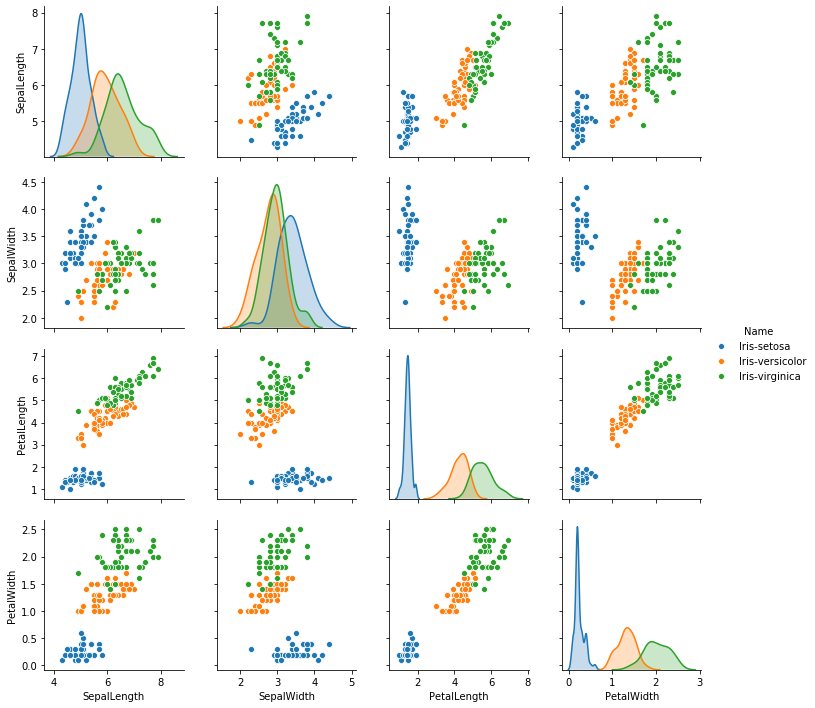

In [248]:
sns.pairplot(iris_df, hue= 'Name')

<span style="color:green">Answer:</span> As seen and compared in the histogram diagrams, we can see for the histogram of Petal Length, setosa is already distinct and versicolor and virginica have the least overlap versus all other attributes. Petal Width has also a similar spread.Distance between the two regions is more in Petal length but the overlap is less in Petal Width.

<span style="color:red">**Question 5b:** </span> If you are allowed to select only two features, which feature would be highly useful for the clustering task. Provide a reason. Use pairplot to answer this question.

<span style="color:green">Answer:</span> The two features that we would choose will be Petal Width and Petal Length as seen in the scatterplot of Petal Width Versus Petal Length, the mean between the different clusters seem to be the farthest and the variance amongst each cluster seem to be the least versus all other scatter plots of other attributes.

<span style="color:red">**Question 5c:** </span>In real-world problems ground-truth (types of iris plants) will not be available to select the features, how do you perform **feature selection** in that case? 

<span style="color:green">Answer:</span> In the real world problems, we can apply unsupervised algorithms to identify patterns in the data. We can see correlation between different attributes by using the correlation matrix. We can select one/ more features as desired from the ones that are highly correlated but not all. Redundant (correlated) can be skipped while performing feature selection.

### 6. Dimensionality Reduction: PCA on Iris Data

<span style="color:red">**Question 6a:** </span> Perform PCA on Iris dataset and project the data onto the first two principal components. Use the attributes 'SepalLength','SepalWidth','PetalLength', and 'PetalWidth'. 

Hint: Use iris_df[['SepalLength','SepalWidth','PetalLength','PetalWidth']] to use the specified attributes.

In [249]:
iris_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [250]:
pca = PCA(2)  # project from 5 to 2 dimensions
projected = pca.fit_transform(iris_df[['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']])
print(iris_df.shape)
print(projected.shape)

(150, 5)
(150, 2)


In [251]:
principalDf = pd.DataFrame(data = projected
             , columns = ['principal component 1', 'principal component 2'])

In [252]:
iris_PCA_Df = pd.concat([principalDf, iris_df[['Name']]], axis = 1)

In [253]:
iris_PCA_Df

,principal component 1,principal component 2,Name
0,-2.684207,0.326607,Iris-setosa
1,-2.715391,-0.169557,Iris-setosa
2,-2.889820,-0.137346,Iris-setosa
3,-2.746437,-0.311124,Iris-setosa
4,-2.728593,0.333925,Iris-setosa
...,...,...,...
145,1.944017,0.187415,Iris-virginica
146,1.525664,-0.375021,Iris-virginica
147,1.764046,0.078519,Iris-virginica
148,1.901629,0.115877,Iris-virginica


<span style="color:red">**Question 6b:** </span> Generate a pairplot (along with colors for the different types of iris plants) between the two newly generated features using PCA in the above step.

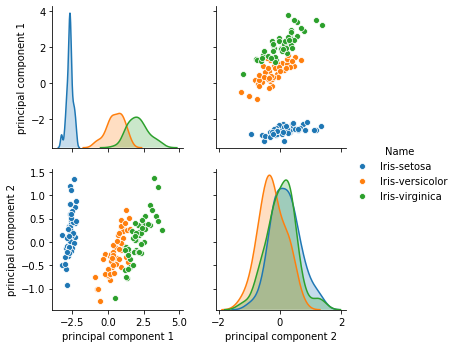

In [254]:
sns.pairplot(iris_PCA_Df, hue='Name')

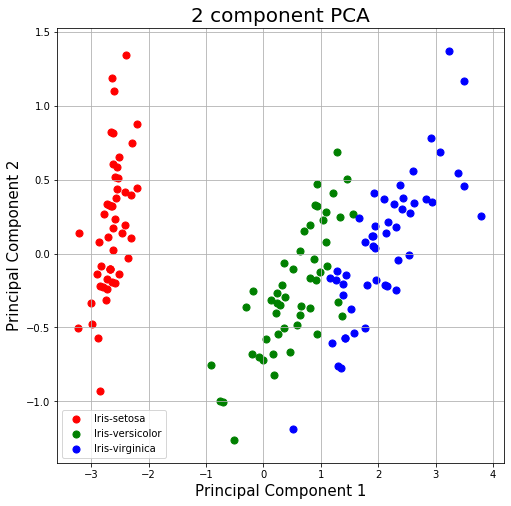

In [255]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = iris_PCA_Df['Name'] == target
    ax.scatter(iris_PCA_Df.loc[indicesToKeep, 'principal component 1']
               , iris_PCA_Df.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

<span style="color:red">**Question 6c:** </span> From the above pairplot, if only one newly generated attribute were to be used for clustering the data which newly generated attribute is best suited. Provide a reason. Is the newly generated attribute better than the feature selected in Question 5a?

<span style="color:green">Answer:</span> We can use the Principal component 1 for clustering the data as seen in the histogram as setosa is distinct and versicolor and virginica has minimal overlap

<span style="color:red">**Question 6d:** </span> From the above pairplot, if two newly generated attributes were to be used for clustering the data, are the two newly generated attributes better than the features selected in Question 5b?

<span style="color:green">Answer:</span> The two newly generated attributes used for clustering are not much better than the features selected in Question 5b as an equal level of distinction can be visualizing achieved previously as well.

<span style="color:red">**Question 6e:** </span> In general, are principal components guaranteed to be more informative than the original features for the data mining task at hand?

<span style="color:green">Answer:</span> The principal components are not adding more information than the actual features. Principal components capture the most variances in ordered way but we might end up loosing some information as compared to the orignial features as we are dropping a number of dimensions and doing dimensionality reduction here.

<span style="color:red">**Question 6f:** </span>In real-world problems ground-truth (types of iris plants) will not be available to determine if the principal compoents or original features are better suited for the data mining task at hand. How should one proceed with the data mining task?

<span style="color:green">Answer:</span> When the types of iris plants are not known in real world, we can draw pair plots and visually inspect if we can see clustering or distinction between data points. We can also inspect the correlation matrix. If dimensions are correlated we can proceed ahead with PCA else we can proceed ahead with feature selection from the original dimensions.

### 7. Dimensionality Reduction: PCA on synthetic datasets

Consider the following synthetic dataset we refer to as **Blobs**. This dataset has 500 data points centered around (-5, -5), (0,0) and (5,5). This dataset has 1500 data points and 2 attributes.

In [256]:
n_samples = 1500
random_state = 42
centers = [(-5, -5), (0, 0), (5, 5)]
Blobs_X, Blobs_y = datasets.make_blobs(n_samples=n_samples,centers=centers,random_state=random_state)

In [257]:
Blobs_X.shape

(1500, 2)

Text(0.5, 1.0, 'Blobs')

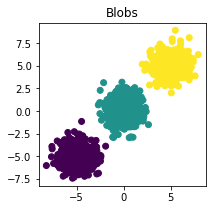

In [258]:
plt.figure(figsize=(3,3))
plt.scatter(Blobs_X[:, 0], Blobs_X[:, 1], c= Blobs_y)
plt.title('Blobs')

We generated a new dataset **Blobs1** by adding an extra attribute to this 2D Blobs dataset. The values for this new attribute are drawn from a normal distribution with mean 0 and variance 1.

In [259]:
Blobs_X

array([[ 0.16846098,  1.31759754],
       [-3.53435123, -5.2257763 ],
       [-6.52552517, -5.69190807],
       ...,
       [-1.24386324, -0.6929052 ],
       [-0.20902326, -0.85052045],
       [ 4.8053027 ,  4.93581182]])

In [260]:
Blobs1= pd.DataFrame(Blobs_X)
Blobs1['2'] = np.random.randn(1500)
Blobs1.head()

,0,1,2
0,0.168461,1.317598,1.997072
1,-3.534351,-5.225776,-0.291780
2,-6.525525,-5.691908,-0.477666
3,-0.120948,0.419532,-0.355008
4,-5.469474,-4.457440,-0.722353


We generated a new dataset **Blobs2** by adding an extra attribute to the 2D Blobs dataset. The values for this new attribute are drawn from a normal distribution with mean 0 and variance 100. Read more about how to do this at https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html.

In [261]:
Blobs2= pd.DataFrame(Blobs_X)
Blobs2['2'] = np.random.randn(1500)*10
Blobs2.head()

,0,1,2
0,0.168461,1.317598,30.535604
1,-3.534351,-5.225776,-4.177898
2,-6.525525,-5.691908,-1.619550
3,-0.120948,0.419532,-13.440124
4,-5.469474,-4.457440,4.833584


We generated a new dataset **Blobs3** by adding two extra attributes to the 2D Blobs dataset. The values for the two new attributes are drawn from a normal distribution with mean 0 and variance 100. 

In [262]:
Blobs3= pd.DataFrame(Blobs_X)
Blobs3['2'] = np.random.randn(1500)*10
Blobs3['3'] = np.random.randn(1500)*10
Blobs3.head()

,0,1,2,3
0,0.168461,1.317598,-10.570166,2.653623
1,-3.534351,-5.225776,-2.998901,-9.405049
2,-6.525525,-5.691908,8.402068,7.494299
3,-0.120948,0.419532,-15.348979,8.108163
4,-5.469474,-4.457440,-1.247957,-2.588562


<span style="color:red">**Question 7a:** </span> Plot pairplot for **Blobs1** data. By visually examining this plot, comment on the variance of the third attribute in comparison to the first two attributes.

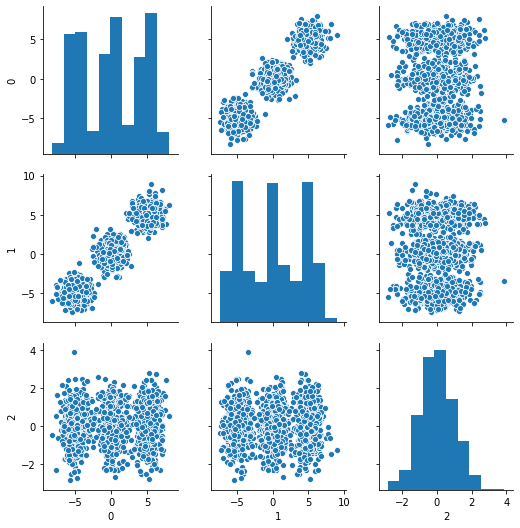

In [263]:
import seaborn as sns
sns.pairplot(Blobs1)

<span style="color:green">Answer:</span> The variance in the third attribute is quite small when compared to the variances of the first two attributes. Also, the third attribute is not covarying with respect to the first and second attribute as seen in the scatter plot and the correlation matrix above.

<span style="color:red">**Question 7b:** </span> Perform PCA on **Blobs1** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [264]:
pca = PCA(2)  # project from 3 to 2 dimensions
projected = pca.fit_transform(Blobs1)
print(Blobs1.shape)
print(projected.shape)

(1500, 3)
(1500, 2)


In [265]:
principalDf = pd.DataFrame(data = projected
             , columns = ['principal component 1', 'principal component 2'])

In [266]:
principalDf

,principal component 1,principal component 2
0,1.010459,1.235869
1,-6.241553,-1.244770
2,-8.684662,0.450237
3,0.165500,0.264077
4,-7.065389,0.512614
...,...,...
1495,2.201866,1.012797
1496,-5.823734,0.880426
1497,-1.415659,0.211749
1498,-0.793659,-0.305779


,principal component 1,principal component 2
principal component 1,3.425602e+01,1.137627e-16
principal component 2,1.137627e-16,9.593272e-01


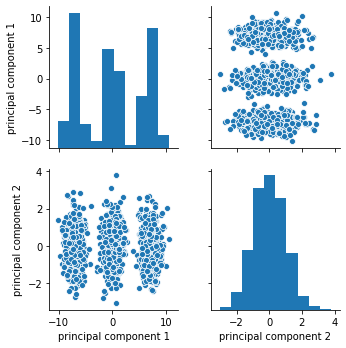

In [267]:
sns.pairplot(principalDf)
principalDf.cov()

<span style="color:red">**Question 7c:** </span> By comparing the distributions for the newly generated attributes in Question 7b with the previous pairplot in Question 7a, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Provide a reason for your observations.

<span style="color:green">Answer:</span> By visual inspection of the principal components we can say attribute 1 and attribute 2 are captured by the principal component 1. The PC 2 is capturing the third attribute. The maximum variance is captured between attribute 1 and 2 and they have a postive covariance as well so attribute 1 and attribute 2 are covered as part of PC1 and by visually inspecting we can see that the spread of third attribute is similar to PC2, hence we can say PC2 is representing a good part of attribute 3.

<span style="color:red">**Question 7d:** </span> Plot pairplot for **Blobs2** data. By visually examining this plot, comment on the variance of the third attribute in comparison to the first two attributes.

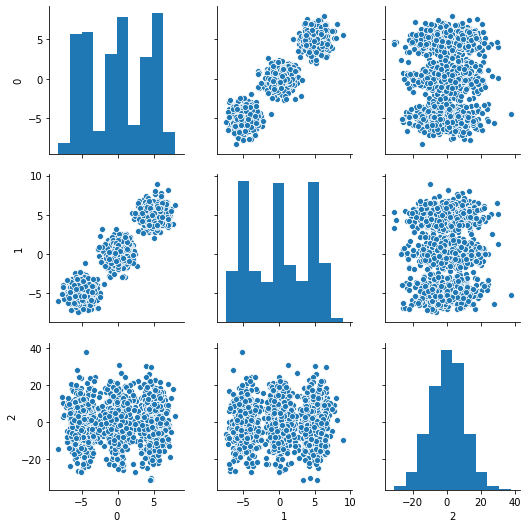

In [268]:
sns.pairplot(Blobs2)

<span style="color:green">Answer:</span> The variance of the third attribute has become larger compared to the first two. Also, the third attribute is not covarying with respect to the first and second attribute as seen in the scatter plot.

<span style="color:red">**Question 7e:** </span> Perform PCA on **Blobs2** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [269]:
pca = PCA(2)  # project from 3 to 2 dimensions
projected = pca.fit_transform(Blobs2)
print(Blobs2.shape)
print(projected.shape)

(1500, 3)
(1500, 2)


In [270]:
principalDf = pd.DataFrame(data = projected
             , columns = ['principal component 1', 'principal component 2'])

In [271]:
principalDf

,principal component 1,principal component 2
0,30.452615,0.046926
1,-4.479139,-6.102577
2,-1.992414,-8.625303
3,-13.529042,0.592681
4,4.508961,-7.209659
...,...,...
1495,-12.799207,2.604630
1496,6.128025,-6.019791
1497,11.269868,-1.770343
1498,16.897645,-1.327851


,principal component 1,principal component 2
principal component 1,9.819521e+01,9.044133e-15
principal component 2,9.044133e-15,3.419236e+01


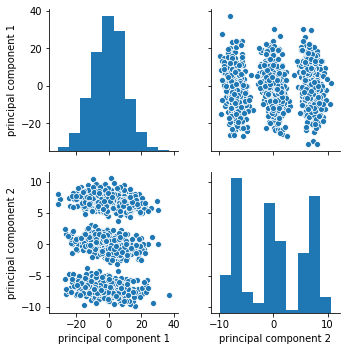

In [272]:
sns.pairplot(principalDf)
principalDf.cov()

<span style="color:red">**Question 7f:** </span> By comparing the distributions for the newly generated attributes in Question 7e with the previous pairplot in Question 7d, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Why would have caused this (in comparison to your observation in Question 7c)?

<span style="color:green">Answer:</span> Now variance for the 3rd attribute has become 100 times as before, it is capturing the most variance and is covered as part of Principal Component 1. Since, now attribute 1 and attribute 2 are correlated and are capturing the lesser variance as compared to Attribute 3, they are captured as part of Principal Component 2.

<span style="color:red">**Question 7g:** </span> Are the three blobs separately visible after projection based on PCA in Question 7e?

<span style="color:green">Answer:</span> Yes, the three blobs separately visible after projection based on PCA in Question 7e

<span style="color:red">**Question 7h:** </span> Plot pairplot for **Blobs3** data. By visually examining this plot, comment on the strength of the correlation between the first two attributes. Also, comment on the strength of the correlation between the second two attributes.

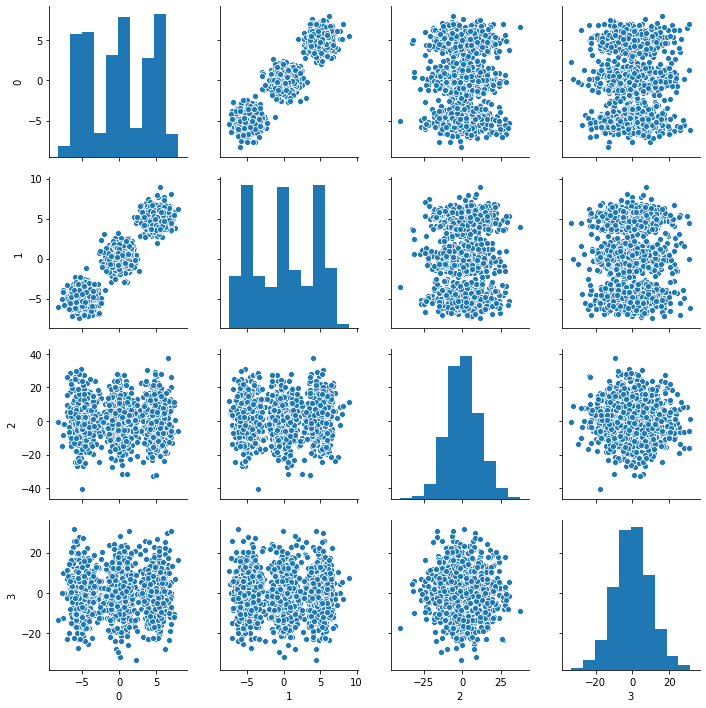

In [273]:
sns.pairplot(Blobs3)

<span style="color:green">Answer:</span> By visual inspection, the correlation between the first two attributes seems to be strongly positively correlated. The correlation between second two attributes seems to be a weak correlation/ uncorrelated.

<span style="color:red">**Question 7i:** </span> Perform PCA on **Blobs3** data. Project data onto the first two principal components. Generate a pairplot for the newly constructed attributes. 

In [274]:
pca = PCA(2)  # project from 4 to 2 dimensions
projected = pca.fit_transform(Blobs3)
print(Blobs3.shape)
print(projected.shape)

(1500, 4)
(1500, 2)


In [275]:
principalDf = pd.DataFrame(data = projected
             , columns = ['principal component 1', 'principal component 2'])

In [276]:
principalDf

,principal component 1,principal component 2
0,11.095112,-2.697237
1,3.594583,9.126563
2,-7.711578,-7.874865
3,15.907208,-8.153775
4,1.875617,2.287523
...,...,...
1495,12.686711,-1.025808
1496,2.254287,-8.611228
1497,12.027058,13.224434
1498,5.887927,1.901620


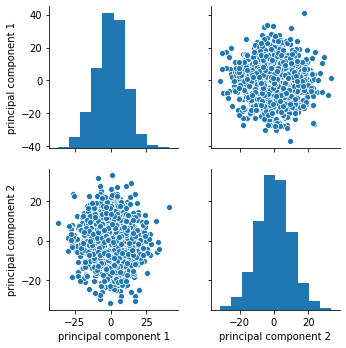

In [277]:
sns.pairplot(principalDf)

<span style="color:red">**Question 7j:** </span>  By comparing the distributions for the newly generated attributes in Question 7i with the previous pairplot in Question 7h, determine which attribute is captured by the first principal component and which attribute is captured by the second principal component. Why would have caused this (in comparison to your observation in Question 7f and 7c)?

<span style="color:green">Answer:</span> The variances captured by the 3rd and the 4th attribute are the most hence the principal components 1 and 2 should capture the information carried by these two attributes - 3rd and 4th.This is because both the attributes are scaled by 10, making the variance increase in those directions.

<span style="color:red">**Question 7k:** </span>  Are the three blobs separately visible after projection based on PCA in Question 7i? What would have caused this, in comparison to your observation in Question 7g?

<span style="color:green">Answer:</span> No, the three blobs are not separately visible after projection based on PCA. In 7g there was only one variable that was scaled up 10 times, while for the scenario in hand there are 2 variables that were scaled by 10. Since, information is captured in attributes 1 and 2 but they are capturing the less of the variances and are not included in PCA, we are unable to get clusters of that data distinguishably. Our Principal components are ending up capturing 3rd and the 4th attribute data as they have the maximum variances.

<span style="color:red">**Question 7l:** </span>  What limitation of PCA do your observations in Questions 7j, 7f, and 7c highlight?

<span style="color:green">Answer:</span> Limitations of PCA - PCA tends to capture the directions with most variances. This might lead to loss of some information captured by the attributes with low variances. If we visualize the data for first three principal components that shows three clusters for Blob3. but when we just stick to two components we miss some information hence can't see a clustering - so loss of information is an issue with PCA. 

Also, PCA is sensitive to the scale of features and needs to be normalized.

### 8. Singular Value Decomposition

<span style="color:green"> **(Optional)** </span> <span style="color:red">Question 8a: </span> Using the code provided in the practice notebook for computing PCA, write your own SVD function (U,S,V = mysvd(A)) to factorize the matrix A into U,S, and V.

<span style="color:green"> **(Optional)** </span>  <span style="color:red">Question 8b: </span> Demonstrate that your code is correct by using your function on the following matrix $A$ and showing that the product $USV^T=A$.

In [278]:
A = np.array([
    [1, 1, 1, 0, 0, 0],
    [3, 3, 3, 0, 0, 0],
    [4, 4, 4, 0, 0, 0],
    [5, 5, 5, 0, 0, 0],
    [0, 1, 0, 4, 4, 1],
    [0, 0, 0, 5, 5, 2],
    [0, 0, 0, 2, 2, 2]])

<span style="color:red">**Question 8c:**</span> Perform SVD on iris dataset and visualize the proportion of variance captured by each spectral value. List the dimensions that captures less than 10% of the total variance.

In [279]:
import pandas as pd
iris_df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/iris.csv')

In [280]:
iris_df

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [281]:
data = iris_df.values[:,0:4]
data = data.astype(float) #converts data format from object to numeric

In [282]:
data.shape

(150, 4)

In [283]:
U, S, V = svd(data, full_matrices = False)

In [284]:
S

array([95.95066751, 17.72295328,  3.46929666,  1.87891236])

In [285]:
np.cumsum(S)/np.sum(S)

array([0.80616025, 0.95506531, 0.98421372, 1.        ])

<span style="color:green">Answer:</span> 3rd and 4th dimension is capturing less than 10 percent of the variance. The first two dimensions are capturing 95.5 percent of the data. 

<span style="color:red">**Question 8d:**</span> The heatmap of the full data is shown below. Plot all the four spectral decomposition matrices based on SVD.

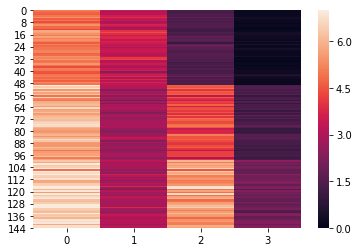

In [286]:
sns.heatmap(data,vmin=0, vmax=7)

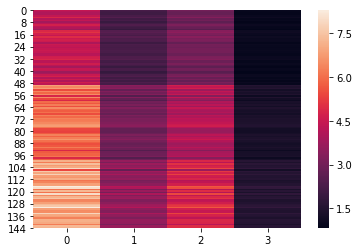

In [287]:
sns.heatmap(S[0]*np.outer(U[:,0],V[0,:]))

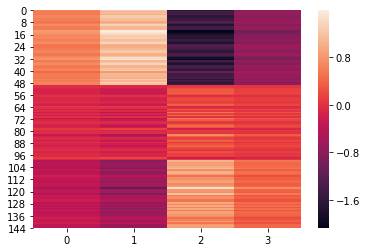

In [288]:
sns.heatmap(S[1]*np.outer(U[:,1],V[1,:]))

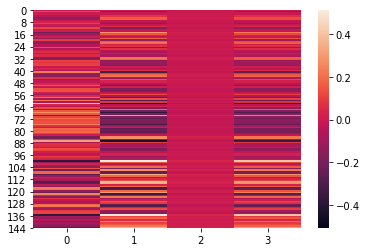

In [289]:
sns.heatmap(S[2]*np.outer(U[:,2],V[2,:]))

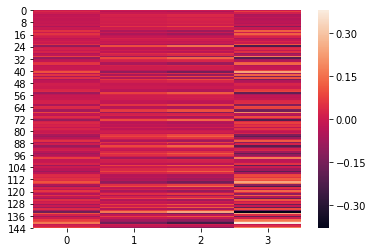

In [290]:
sns.heatmap(S[3]*np.outer(U[:,3],V[3,:]))

<span style="color:red">**Question 8e:**</span> Visually examine the magnitude of values present in each of the four spectral decomposition matrices and comment on which two of the four matrices have elements with relatively small magnitude in them. Provide a reason for this based on your obsevation in Question 8c. 

<span style="color:green">Answer:</span> Visually examining the heat map of the original data with the first spectral value data and the second spectral value data, we see a lot of similarity. While when we look at the 3rd and 4th spectral value data we see that they are different. We can conclude the first and second have elements with good enough magnitude to represent the data while third and fourth have have elements with small magnitude in them.

### 9. Linear Discriminant Analysis

We will use digits data for studying the use of LDA.

In [291]:
digits = load_digits()

The data with 1797 samples and 64 attributes is in the object digits.data. These 64 attributes represent pixels in an 8x8 image.

In [292]:
digits.data.shape

(1797, 64)

The 1797 images are digits from 0...9. This information is in the digits.target variable.

In [293]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

For this part, we will only focus on digits 3 and 8. To this end, we generate indices of 183 samples with 3s and indices of 174 samples with 8s.

In [294]:
Threes = np.where(digits.target==3)
Eights = np.where(digits.target==8)
[np.size(Threes), np.size(Eights)]

[183, 174]

We will take samples from these indices and construct a matrix X such that the first 183 samples represent 3s and the remaining ones represent 8s. The variable y captures this information.

In [295]:
indices = np.hstack((Threes[0], Eights[0]));
X = digits.data[indices,:]
y = np.hstack((3*np.ones(np.size(Threes)), 8*np.ones(np.size(Eights))))

In [296]:
X

array([[ 0.,  0.,  7., ...,  9.,  0.,  0.],
       [ 0.,  2.,  9., ..., 11.,  0.,  0.],
       [ 0.,  1.,  8., ...,  2.,  0.,  0.],
       ...,
       [ 0.,  0.,  5., ...,  3.,  0.,  0.],
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [297]:
X.shape

(357, 64)

In [298]:
y

array([3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8., 8.,
       8., 8., 8., 8., 8.

In [299]:
y.shape

(357,)

<span style="color:red">**Question 9a:**</span> Visually examine the following heatmap of the data X and comment which among attributes 43 and 45 can separate the 3s from 8s better.

[Text(159.0, 0.5, 'Samples'), Text(0.5, 69.0, 'Attributes')]

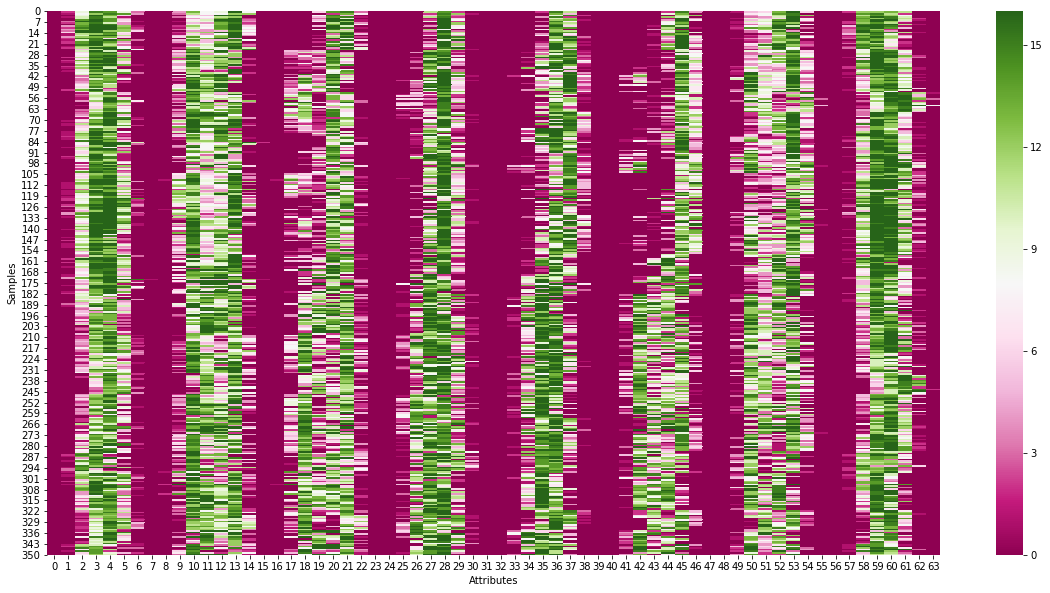

In [300]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(X,cmap='PiYG')
ax.set(xlabel='Attributes', ylabel='Samples')


<span style="color:green">Answer:</span> 43 seems to be better at classifying data as we can already see some classification between 3s (greens) and 8s (magenta).

<span style="color:red">**Question 9b:**</span> Perform LDA on this data. Plot the heatmap of the projected data and comment if the resultant projection is better than the best attribute between 43 and 45.

In [301]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_r1 = lda.fit(X,y).transform(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


[Text(159.0, 0.5, 'Samples'), Text(0.5, 69.0, 'Attributes')]

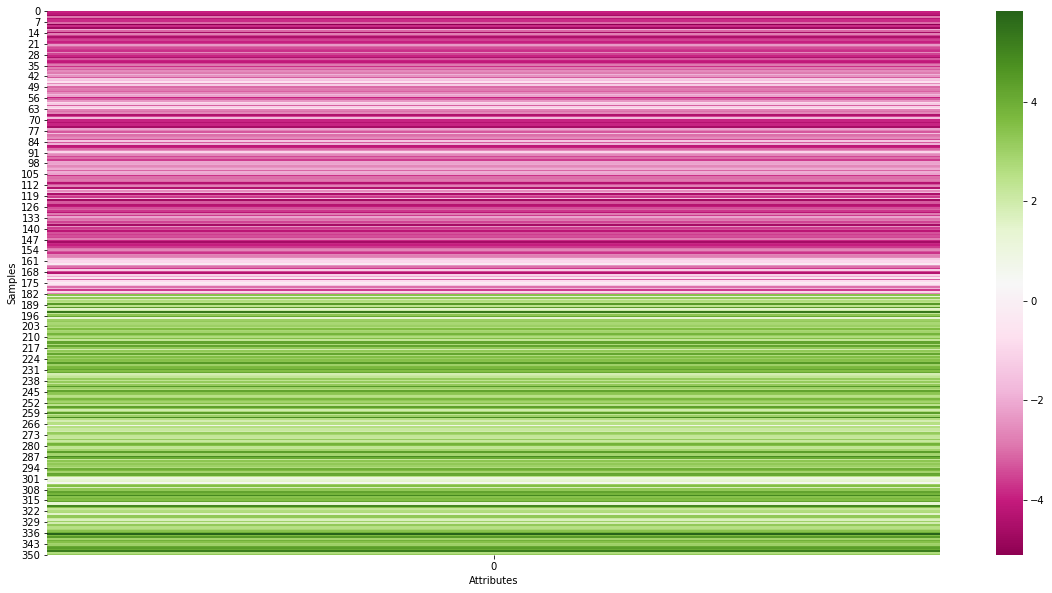

In [302]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(X_r1,cmap='PiYG')
ax.set(xlabel='Attributes', ylabel='Samples')

<span style="color:green">Answer:</span> Yes, the LDA on the entire dataset is better classfying than the best attribute between 43 and 45

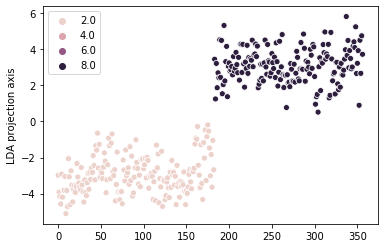

In [303]:
fig = sns.scatterplot(x=np.arange(np.size(X_r1)),y=X_r1[:,0],hue=y)
plt.ylabel('LDA projection axis')
plt.show(fig)